<a href="https://colab.research.google.com/github/anpetrushin/chatbot/blob/master/%D0%A3%D0%BD%D0%B8%D0%B2%D0%B5%D1%80%D1%81%D0%B8%D1%82%D0%B5%D1%82_%D0%B8%D1%81%D0%BA%D1%83%D1%81%D1%81%D1%82%D0%B2%D0%B5%D0%BD%D0%BD%D0%BE%D0%B3%D0%BE_%D0%B8%D0%BD%D1%82%D0%B5%D0%BB%D0%BB%D0%B5%D0%BA%D1%82%D0%B0_%D0%98%D0%BD%D1%82%D0%B5%D0%BD%D1%81%D0%B8%D0%B2_22_12_24_12_%D0%97%D0%B0%D0%BD%D1%8F%D1%82%D0%B8%D0%B5_%E2%84%962_%D0%9E%D0%B1%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%BA%D0%B0_%D1%82%D0%B5%D0%BA%D1%81%D1%82%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install terra_ai

     |████████████████████████████████| 81kB 7.9MB/s 


In [ ]:
from terra_ai import терра_ии

ВНИМАНИЕ!!! Были установлены дополнительные библиотеки. Необходимо перезапустить среду для продолжения работы
Выберите пункт меню Runtime/Restart runtime и нажмите «Yes»
После этого сделайте повторный запуск ячейки: import terra_ai


# Определение заболевания по симптомам

In [ ]:
# Загружаем базу симптомов заболеваний
терра_ии.загрузить_базу('СИМПТОМЫ ЗАБОЛЕВАНИЙ')

Загрузка данных завершена 




In [ ]:
# Выводим примеры
терра_ии.показать_примеры(база = 'симптомы')

В данной базе содержатся симптомы следующих заболеваний:
['Дуоденит', 'Аппендицит', 'Гастрит', 'Энтерит', 'Язва', 'Панкреатит', 'Гепатит', 'Колит', 'Эзофагит', 'Холицестит']

Пример симптомов случайного заболевания:
Заболевание:  Панкреатит
Симптомы:
     *    Боль при панкреатите обычно очень интенсивная, постоянная, характер болевых ощущений описывается 


In [ ]:
количество_анализируемых_слов = 1100
ширина_шага = 50
# Создаем выборки для обучения нейронной сети
(обучающая_выборка, метки_обучающей_выборки), (тестовая_выборка, метки_тестовой_выборки) = терра_ии.создать_текстовые_выборки(
    количество_анализируемых_слов,
    ширина_шага
)

Формирование выборки завершено


In [ ]:
# Создаем нейронную сеть
ветвь1 = 'Эмбеддинг-100-'+str(количество_анализируемых_слов)+'-'+str(ширина_шага)+'\
 Дропаут-0.3\
 Выравнивающий\
 Полносвязный-200\
 Дропаут-0.4'
ветвь2 = 'Полносвязный-4096 Полносвязный-256 Дропаут-0.5 Полносвязный-64'
ветвь3 = 'Полносвязный-100'
нейронка = терра_ии.создать_составную_сеть(
    обучающая_выборка,
    ветвь1, ветвь2, ветвь3)

Схема модели:


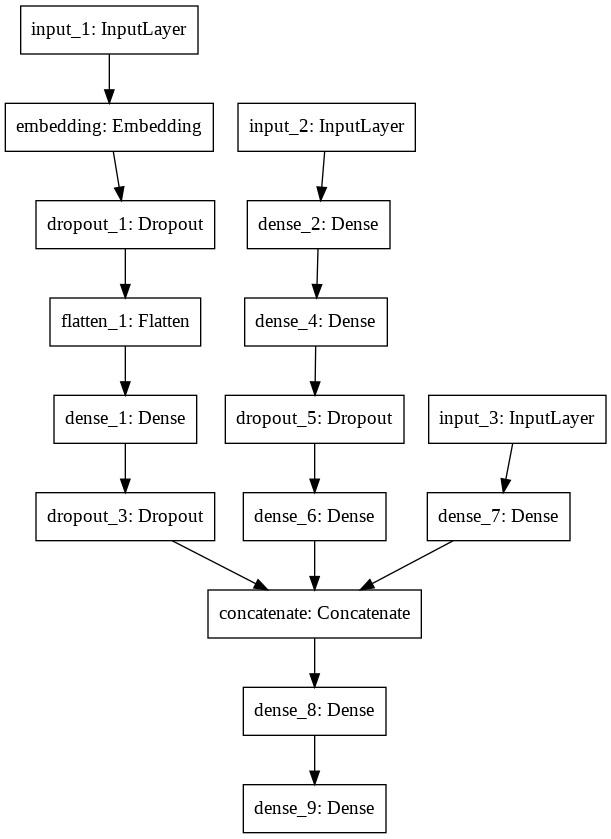

In [ ]:
# Выводим структуру модели
терра_ии.схема_модели(нейронка)

Эпоха №1  Время обучения: 12.93c Точность на обучающей выборке: 98.23%       Точность на проверочной выборке: 83.31%
Эпоха №2  Время обучения: 11.18c Точность на обучающей выборке: 100.0%       Точность на проверочной выборке: 83.38%
Эпоха №3  Время обучения: 11.59c Точность на обучающей выборке: 100.0%       Точность на проверочной выборке: 82.85%
Эпоха №4  Время обучения: 11.83c Точность на обучающей выборке: 100.0%       Точность на проверочной выборке: 84.7%
Эпоха №5  Время обучения: 11.0c  Точность на обучающей выборке: 100.0%       Точность на проверочной выборке: 83.91%
Эпоха №6  Время обучения: 10.96c Точность на обучающей выборке: 100.0%       Точность на проверочной выборке: 84.17%
Эпоха №7  Время обучения: 10.81c Точность на обучающей выборке: 100.0%       Точность на проверочной выборке: 85.43%
Эпоха №8  Время обучения: 10.73c Точность на обучающей выборке: 100.0%       Точность на проверочной выборке: 84.77%
Эпоха №9  Время обучения: 10.73c Точность на обучающей выборке: 1

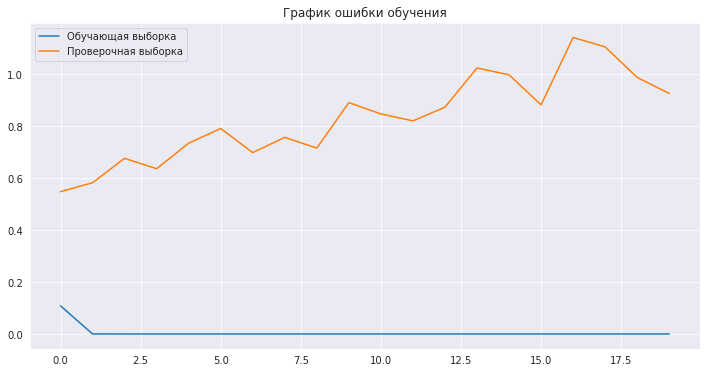

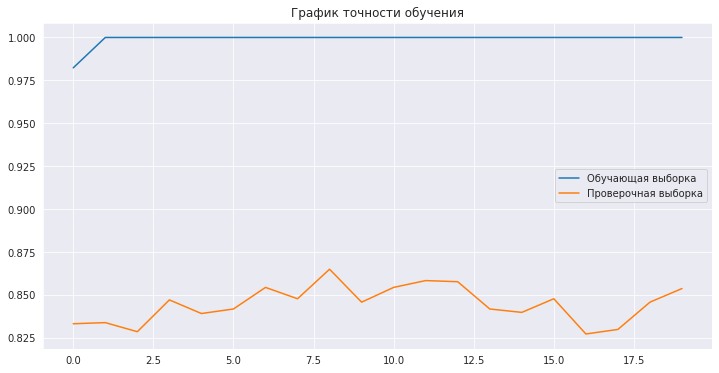

In [ ]:
# Обучаем модель
терра_ии.обучение_модели(
    нейронка,
    обучающая_выборка, метки_обучающей_выборки,
    тестовая_выборка, метки_тестовой_выборки,
    размер_пакета = 16,
    количество_эпох = 20)

In [ ]:
# Демонстрация результата работы нейронной сети
симптомы = '''боль и тяжесть в правом подреберье, лопатке, боку;
отсутствие аппетита, рвота, тошнота'''
терра_ии.тест_модели_симптомы(нейронка, симптомы, классы = ['Дуоденит', 'Аппендицит', 'Гастрит', 'Энтерит', 'Язва', 'Панкреатит', 'Гепатит', 'Колит', 'Эзофагит', 'Холицестит'])

Дуоденит       -  0.46 %
Аппендицит     -  1.05 %
Гастрит        -  3.98 %
Энтерит        -  1.17 %
Язва           -  1.3 %
Панкреатит     -  8.83 %
Гепатит        -  1.65 %
Колит          -  3.36 %
Эзофагит       -  2.69 %
Холицестит     -  75.51 %

Диагноз: Холицестит - 75.51%


# Чат-бот

In [ ]:
# Загружаем базу для чат-бота
вопросы, ответы = терра_ии.загрузить_базу('ДИАЛОГИ', справка=True)

Загрузка данных завершена 

Загружена база диалогов
Количество пар вопрос-ответ: 50 тысяч



In [ ]:
#Показываем примеры
терра_ии.показать_примеры(
    вопросы = вопросы,
    ответы = ответы,
    количество = 4)


Вопрос: - Слушай,  чего  ты  на  меня все фыркаешь?
Ответ: - Умолкни!

Вопрос: - Вы... не записаны на пленку? Вы... не робот?
Ответ: - Вовсе нет. Я живой утешитель.

Вопрос: - Долго ждать-то? Чего копаешься, Петруха!
Ответ: - Так стакан не дает!

Вопрос: - С текстом в руке?
Ответ: - Конечно.


In [ ]:
# Создаем выборки
обучающая_выборка, метки_обучающей_выборки, размер_словаря = терра_ии.создать_выборки_для_чатбота(вопросы, ответы, количество_пар=400)

In [ ]:
# Создаем модель
энкодер = 'Эмбеддинг-200 ЛСТМ-200'
декодер = 'Эмбеддинг-200 ЛСТМ-200'
чат_бот = терра_ии.создать_модель_Sequence_to_Sequence(размер_словаря, энкодер, декодер)

Схема модели:


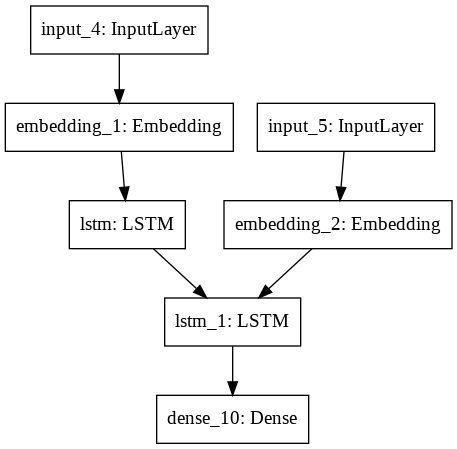

In [ ]:
# Выводим структуру модели
терра_ии.схема_модели(чат_бот)

Эпоха №1  Время обучения: 10.28c Точность на обучающей выборке: 33.92%
Эпоха №2  Время обучения: 0.96c  Точность на обучающей выборке: 39.26%
Эпоха №3  Время обучения: 0.94c  Точность на обучающей выборке: 40.1%
Эпоха №4  Время обучения: 0.94c  Точность на обучающей выборке: 40.39%
Эпоха №5  Время обучения: 0.94c  Точность на обучающей выборке: 40.54%
Эпоха №6  Время обучения: 0.96c  Точность на обучающей выборке: 40.54%
Эпоха №7  Время обучения: 0.95c  Точность на обучающей выборке: 40.88%
Эпоха №8  Время обучения: 0.95c  Точность на обучающей выборке: 41.47%
Эпоха №9  Время обучения: 0.93c  Точность на обучающей выборке: 41.18%
Эпоха №10 Время обучения: 0.94c  Точность на обучающей выборке: 41.67%
Эпоха №11 Время обучения: 0.94c  Точность на обучающей выборке: 42.89%
Эпоха №12 Время обучения: 0.93c  Точность на обучающей выборке: 43.48%
Эпоха №13 Время обучения: 0.96c  Точность на обучающей выборке: 44.56%
Эпоха №14 Время обучения: 0.95c  Точность на обучающей выборке: 45.29%
Эпоха №

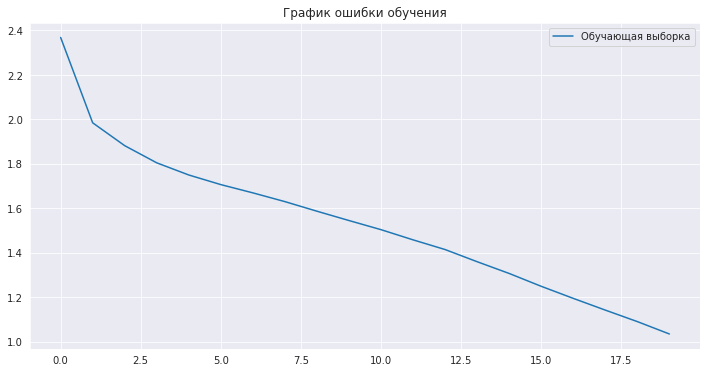

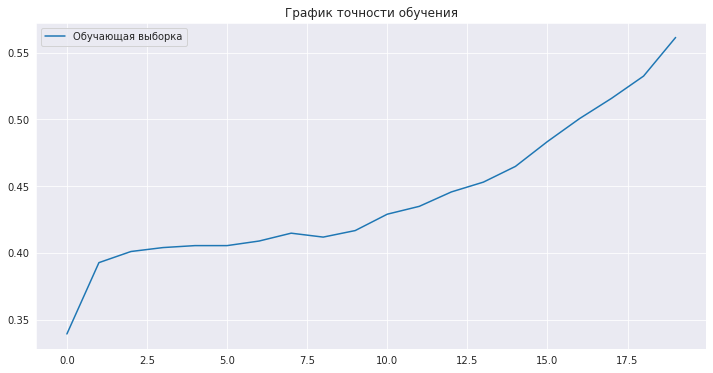

In [ ]:
# Обучаем модель
терра_ии.обучение_модели(
    чат_бот,
    обучающая_выборка, метки_обучающей_выборки,
    размер_пакета = 4,
    количество_эпох = 20)

In [ ]:
терра_ии.тест_чат_бота(чат_бот, размер_словаря, энкодер, декодер)

Тест общения с ботом. (Для завершения наберите «Выход»)
Задайте вопрос : кто
 стреляла винтовку ждем ваше ждем ваше вещами вещами положено карьером неделю подавили говори гов
Задайте вопрос : ты где
 исчезнет исчезнет пор договорились договорились громоотвод полдень громоотвод полдень штаба начинайте танков скулит ску
Задайте вопрос : когда
 целый бил целый бил целый бил целый доставке полк медальоны досталось медальоны обходят са
Задайте вопрос : Выход


In [ ]:
терра_ии.тест_обученного_чат_бота()


Тест общения с ботом. (Для завершения наберите «Выход»)
Задайте вопрос : привет
 что тебе надо человек 
Задайте вопрос : ты кто
 наш вид известен как люди 
Задайте вопрос : который час
 около шести 
Задайте вопрос : откуда ты
 с ростова на дону 
Задайте вопрос : а точнее
 на пиренейском полуострове 
Задайте вопрос : сколько времени
 без пяти пять 
Задайте вопрос : давай поиграем
 что ж почему ничего не из за себя 
Задайте вопрос : ты где
 этаж 12 стол регистрации 19 
Задайте вопрос : Выход


# Сегментация договоров

In [ ]:
# Загружаем базу договоров
договоры = терра_ии.загрузить_базу('ДОГОВОРЫ', справка=True)

Загрузка данных завершена 

Загружена база договоров
База размечена по 6 категориям: Условия - Запреты - Стоимость - Деньги - Сроки - Неустойка



In [ ]:
# Показываем примеры
терра_ии.показать_пример_договора()

﻿ДОГОВОР МЕНЫ ОСНОВНЫХ СРЕДСТВ (АВТОМОБИЛЕЙ) № _____

г. ____________________ ___________________________«___» ______________ _______ г. 

________________________________________ в лице ________________________________________, действующего на основании ________________________________________, именуемый в дальнейшем «Сторона 1», с одной стороны, и ________________________________________ в лице ________________________________________, действующего на основании ________________________________________, именуемый в дальнейшем «Сторона 2», с другой стороны, именуемые в дальнейшем «Стороны», заключили настоящий договор, в дальнейшем «Договор», о нижеследующем: 

1. ПРЕДМЕТ ДОГОВОРА

1.1. Стороны договорились произвести на условиях настоящего договора обмен автомобилей: автомобиль марки ______________, №_______, двигатель №______________, кузов №______________, год выпуска _______; на автомобиль марки ______________, №_______, двигатель №______________, кузов №______________, год выпуска

In [ ]:
# Создаем выборки
обучающая_выборка, метки_обучающей_выборки, теги = терра_ии.создать_выборки_сегментация_текста(договоры)

In [ ]:
# Создаем модель
слои = 'Сверточный1D-128-3 Сверточный1D-64-3 Сверточный1D-32-3 Сверточный1D-6-3-same-sigmoid' # Указываем слои создаваемой модели
входной_размер = терра_ии.получить_входной_размер(обучающая_выборка)


# Создаем модель
нейронка_1 = терра_ии.создать_сеть(
    слои = слои,
    входной_размер = входной_размер,
    задача='сегментация текста'
    )

Создана модель нейронной сети!


Схема модели:


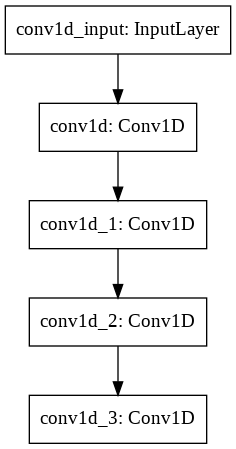

In [ ]:
# Выводим структуру модели
терра_ии.схема_модели(нейронка_1)

Эпоха №1  Время обучения: 5.76c  Точность на обучающей выборке: 48.32%
Эпоха №2  Время обучения: 4.23c  Точность на обучающей выборке: 55.13%
Эпоха №3  Время обучения: 4.29c  Точность на обучающей выборке: 60.46%
Эпоха №4  Время обучения: 4.2c   Точность на обучающей выборке: 64.03%
Эпоха №5  Время обучения: 4.23c  Точность на обучающей выборке: 66.37%
Эпоха №6  Время обучения: 4.22c  Точность на обучающей выборке: 67.81%
Эпоха №7  Время обучения: 4.15c  Точность на обучающей выборке: 68.78%
Эпоха №8  Время обучения: 4.18c  Точность на обучающей выборке: 69.65%
Эпоха №9  Время обучения: 4.19c  Точность на обучающей выборке: 70.22%
Эпоха №10 Время обучения: 4.21c  Точность на обучающей выборке: 70.72%



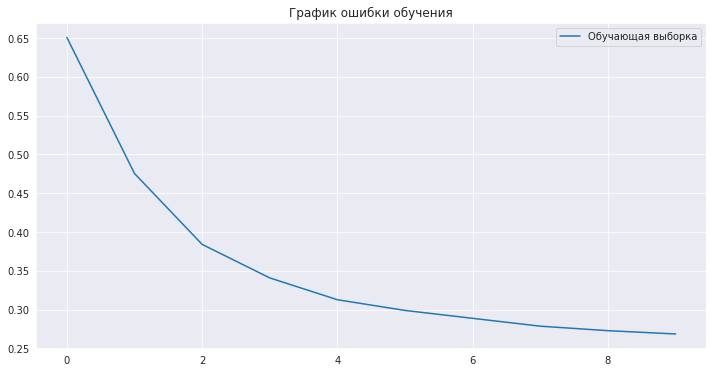

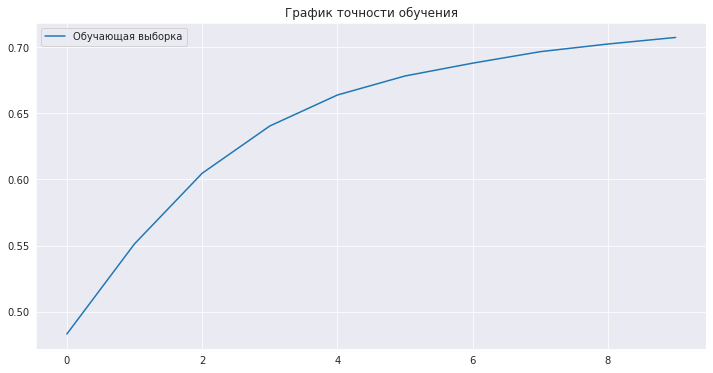

In [ ]:
# Обучаем модель
терра_ии.обучение_модели(
    нейронка_1,
    обучающая_выборка, метки_обучающей_выборки,
    размер_пакета = 16,
    количество_эпох = 10)

In [ ]:
# тестируем модель
терра_ии.тест_модели_сегментации_договоров(нейронка_1, теги, договоры)

Тест модели:
Сеть распознала категорию 'S1' на 49.42%
Сеть распознала категорию 'S2' на 98.9%
Сеть распознала категорию 'S3' на 78.57%
Сеть распознала категорию 'S4' на 89.78%
Сеть распознала категорию 'S5' на 93.32%
Сеть распознала категорию 'S6' на 99.0%
Cредняя точность 84.83%


# Предсказание цены квартиры

In [ ]:
# Загружаем базу квартир
терра_ии.загрузить_базу(база = 'КВАРТИРЫ', справка = True)

Загрузка данных завершена 

Загружена база квартир



In [ ]:
# Показываем примеры
терра_ии.показать_пример_квартиры(количество=3)

* Пример объявления: 

Колчиество комнат:  1
Площадь квартиры:   32/21/6
Метро/ЖД станция:   Селигерская м.
От станции:         4т
Дом:                5/5 П
Балкон:             Б
Санузел:            С
Примечание:         Можете тут писать или вайбер. Продаю свою (объявление реального собственника; показа квартиры ещё не было ни одного; по реновации (дом строят рядом ангарская, 33 - односекционный дом -15 этажей с подземной стоянкой) дадут квартиру на 1, 5-2 млн руб. выше (итого 7, 5-8млн. р), но в связи с обстоятельствами описанными ниже решила продать) однокомнатную квартиру 32 кВ. м (жилая 21 кВ. м) с балконом в Москве в пешей доступности метро Селигерская, метро Ховрино. В ванне плитка, в комнате-ламинат; окна деревянные-зимой тепло, не дует; окна во двор; соседей не слышно; в квартире все есть-стир. машинка, комод
для вещей, шкаф для вещей, холодильник, кровать с ортопедическим матрасом, стол, стулья, чайник. Могу вывезти, если надо будет. Рядом Ангарский парк с прудами, велодорожк

In [ ]:
# Создаем выборки
(обучающая_выборка, метки_обучающей_выборки), (тестовая_выборка, метки_тестовой_выборки), инструменты = терра_ии.создать_выборки_квартир()

In [ ]:
ветвь1 = 'Полносвязный-100-relu Полносвязный-50-linear'
ветвь2 = 'Полносвязный-500-linear'
финальная_часть = 'Полносвязный-1000-relu Полносвязный-500-relu Полносвязный-100-relu Полносвязный-1-linear'
нейронка = терра_ии.создать_составную_сеть_квартиры(обучающая_выборка, ветвь1, ветвь2, финальная_часть)

Схема модели:


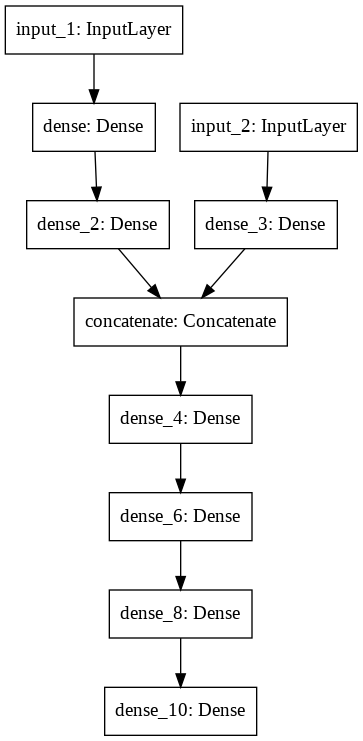

In [ ]:
# Выводим схему модели
терра_ии.схема_модели(нейронка)

Эпоха №1  Время обучения: 7.53c  Ошибка на обучающей выборке: 1.661млн       Ошибка на проверочной выборке: 1.576млн
Эпоха №2  Время обучения: 4.59c  Ошибка на обучающей выборке: 1.522млн       Ошибка на проверочной выборке: 1.48млн
Эпоха №3  Время обучения: 4.49c  Ошибка на обучающей выборке: 1.585млн       Ошибка на проверочной выборке: 1.398млн
Эпоха №4  Время обучения: 4.64c  Ошибка на обучающей выборке: 1.74млн        Ошибка на проверочной выборке: 1.67млн
Эпоха №5  Время обучения: 4.69c  Ошибка на обучающей выборке: 1.581млн       Ошибка на проверочной выборке: 1.487млн
Эпоха №6  Время обучения: 4.58c  Ошибка на обучающей выборке: 1.072млн       Ошибка на проверочной выборке: 1.159млн
Эпоха №7  Время обучения: 4.45c  Ошибка на обучающей выборке: 1.307млн       Ошибка на проверочной выборке: 1.357млн
Эпоха №8  Время обучения: 4.42c  Ошибка на обучающей выборке: 1.396млн       Ошибка на проверочной выборке: 1.392млн
Эпоха №9  Время обучения: 4.43c  Ошибка на обучающей выборке: 1.12

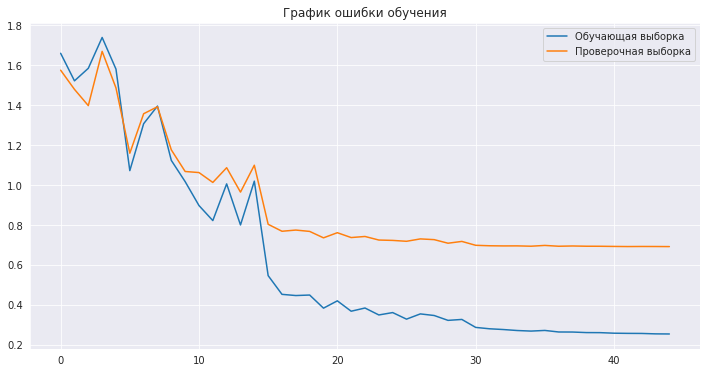

In [ ]:
# Обучаем модель
терра_ии.обучение_модели_квартиры(
    нейронка,
    обучающая_выборка, метки_обучающей_выборки,
    тестовая_выборка, метки_тестовой_выборки,
    размер_пакета = 128,
    количество_эпох = 15,
    инструменты = инструменты)

In [ ]:
#@title Тестирование модели: выберите параметры
метро = "\u0421\u043F\u0430\u0440\u0442\u0430\u043A \u043C." #@param ['Авиамоторная м.', 'Автозаводская м.', 'Автозаводская м. (МЦК)', 'Академическая м.', 'Алабушево станция', 'Александровский Сад м.', 'Алексеевская м.', 'Алма-Атинская м.', 'Алтуфьево м.', 'Андроновка м. (МЦК)', 'Аннино м.', 'Апрелевка станция', 'Арбатская м.', 'Аэропорт (старая) станция', 'Аэропорт Внуково станция', 'Аэропорт м.', 'Бабушкинская м.', 'Багратионовская м.', 'Балтийская м. (МЦК)', 'Баррикадная м.', 'Бауманская м.', 'Беговая м.', 'Бекасово-1 станция', 'Белокаменная м. (МЦК)', 'Беломорская м.', 'Белорусская м.', 'Беляево м.', 'Бибирево м.', 'Библиотека им.Ленина м.', 'Битцевский парк м.', 'Борисово м.', 'Боровицкая м.', 'Боровское шоссе м.', 'Ботанический сад м.', 'Ботанический сад м. (МЦК)', 'Братиславская м.', 'Бульвар Адмирала Ушакова м.', 'Бульвар Дмитрия Донского м.', 'Бульвар Рокоссовского м.', 'Бульвар Рокоссовского м. (МЦК)', 'Бунинская аллея м.', 'Бутырская м.', 'ВДНХ м.', 'Варшавская м.', 'Верхние Котлы м. (МЦК)', 'Верхние Лихоборы м.', 'Весенняя станция', 'Владыкино м.', 'Внуково станция', 'Водный стадион м.', 'Войковская м.', 'Волгоградский проспект м.', 'Волжская м.', 'Волоколамская м.', 'Воробьевы Горы м.', 'Выставочная м.', 'Выхино м.', 'Говорово м.', 'Гривно станция', 'Дачная станция', 'Деловой центр м.', 'Динамо м.', 'Дмитровская м.', 'Добрынинская м.', 'Домодедовская м.', 'Достоевская м.', 'Дубровка м.', 'Дубровка м. (МЦК)', 'Жулебино м.', 'ЗИЛ м. (МЦК)', 'Зорге м. (МЦК)', 'Зябликово м.', 'Измайлово м. (МЦК)', 'Измайловская м.', 'Калужская м.', 'Кантемировская м.', 'Каховская м.', 'Каширская м.', 'Киевская м.', 'Китай-Город м.', 'Кожуховская м.', 'Кокошкино станция', 'Коломенская м.', 'Колхозная станция', 'Коммунарка м.', 'Комсомольская м.', 'Коньково м.', 'Коптево м. (МЦК)', 'Косино м.', 'Котельники м.', 'Красногвардейская м.', 'Краснопресненская м.', 'Красносельская м.', 'Красные ворота м.', 'Крекшино станция', 'Крестьянская Застава м.', 'Кропоткинская м.', 'Крылатское м.', 'Крымская м. (МЦК)', 'Кузнецкий мост м.', 'Кузьминки м.', 'Кунцевская м.', 'Курская м.', 'Кутузовская м.', 'Кутузовская м. (МЦК)', 'Ленинский проспект м.', 'Лермонтовский проспект м.', 'Лесопарковая м.', 'Лихоборы м. (МЦК)', 'Локомотив м. (МЦК)', 'Ломоносовский проспект м.', 'Лубянка м.', 'Лужники м. (МЦК)', 'Лухмановская м.', 'Львовская станция', 'Люблино м.', 'Марксистская м.', 'Марьина Роща м.', 'Марьино м.', 'Маяковская м.', 'Медведково м.', 'Международная м.', 'Менделеевская м.', 'Минская м.', 'Митино м.', 'Мичуринец станция', 'Мичуринский проспект м.', 'Молодежная м.', 'Мякинино м.', 'Нагатинская м.', 'Нагорная м.', 'Нахимовский проспект м.', 'Некрасовка м.', 'Нижегородская м. (МЦК)', 'Нижегородская улица м.', 'Новогиреево м.', 'Новокосино м.', 'Новокузнецкая м.', 'Новопеределкино м.', 'Новослободская м.', 'Новохохловская м. (МЦК)', 'Новоясеневская м.', 'Новые Черемушки м.', 'Озерная м.', 'Окружная м.', 'Окружная м. (МЦК)', 'Окская улица м.', 'Октябрьская м.', 'Октябрьское поле м.', 'Ольховая м.', 'Орехово м.', 'Отрадное м.', 'Охотный ряд м.', 'Павелецкая м.', 'Панфиловская м. (МЦК)', 'Парк Победы м.', 'Парк культуры м.', 'Партизанская м.', 'Первомайская м.', 'Перово м.', 'Петровский парк м.', 'Петровско-Разумовская м.', 'Печатники м.', 'Пионерская м.', 'Планерная м.', 'Площадь Гагарина м. (МЦК)', 'Площадь Ильича м.', 'Площадь Революции м.', 'Победа станция', 'Подольск станция', 'Полежаевская м.', 'Полянка м.', 'Пражская м.', 'Преображенская площадь м.', 'Прокшино м.', 'Пролетарская м.', 'Проспект Вернадского м.', 'Проспект Мира м.', 'Профсоюзная м.', 'Пушкинская м.', 'Пятницкое шоссе м.', 'Раменки м.', 'Рассказовка м.', 'Рассудово станция', 'Речной вокзал м.', 'Рижская м.', 'Римская м.', 'Ростокино м. (МЦК)', 'Румянцево м.', 'Рязанский проспект м.', 'Савеловская м.', 'Савеловская метро', 'Саларьево м.', 'Свиблово м.', 'Севастопольская м.', 'Селигерская м.', 'Семеновская м.', 'Серпуховская м.', 'Силикатная станция', 'Славянский бульвар м.', 'Смоленская м.', 'Сокол м.', 'Соколиная Гора м. (МЦК)', 'Сокольники м.', 'Солнцево м.', 'Спартак м.', 'Спортивная м.', 'Сретенский бульвар м.', 'Стахановская м.', 'Столбово м.', 'Стрешнево м. (МЦК)', 'Строгино м.', 'Студенческая м.', 'Сухаревская м.', 'Сходненская м.', 'Таганская м.', 'Тверская м.', 'Театральная м.', 'Текстильщики м.', 'Теплый стан м.', 'Технопарк м.', 'Тимирязевская м.', 'Толстопальцево станция', 'Третьяковская м.', 'Тропарево м.', 'Трубная м.', 'Тульская м.', 'Тургеневская м.', 'Тушинская м.', 'Угрешская м. (МЦК)', 'Улица 1905 года м.', 'Улица Академика Янгеля м.', 'Улица Горчакова м.', 'Улица Дмитриевского м.', 'Улица Скобелевская м.', 'Улица Старокачаловская м.', 'Университет м.', 'Филатов луг м.', 'Филевский парк м.', 'Фили м.', 'Фонвизинская м.', 'Фрунзенская м.', 'Ховрино м.', 'Хорошево м. (МЦК)', 'Хорошевское м.', 'ЦСКА м.', 'Царицыно м.', 'Цветной бульвар м.', 'Черкизовская м.', 'Чертановская м.', 'Чеховская м.', 'Чистые пруды м.', 'Чкаловская м.', 'Шаболовская м.', 'Шелепиха м.', 'Шелепиха м. (МЦК)', 'Шипиловская м.', 'Шоссе Энтузиастов м.', 'Шоссе Энтузиастов м. (МЦК)', 'Щелковская м.', 'Щербинка станция', 'Щукинская м.', 'Электрозаводская м.', 'Юго-Восточная м.', 'Юго-Западная м.', 'Южная м.', 'Ясенево м.']
до_станции =  5#@param {type:"integer"}
способ_передвижения = "\u043F\u0435\u0448\u043A\u043E\u043C" #@param ['пешком', 'транспорт']
этаж =  7#@param {type:"integer"}
всего_этажей =  14#@param {type:"integer"}
тип_балкона = 'Л' #@param ['Л', 'Б', '2Б', '-', '2Б2Л', 'БЛ', '3Б', '2Л', 'Эрк', 'Б2Л', 'ЭркЛ', '3Л', '4Л', '*Л', '*Б']
тип_санузла = '2' #@param ['2', 'Р', 'С', '-', '2С', '+', '4Р', '2Р', '3С', '4С', '4', '3', '3Р']
площадь = 50.6 #@param {type:"number"}
описание = '\u043E\u0442\u043B\u0438\u0447\u043D\u0430\u044F \u043A\u0432\u0430\u0440\u0442\u0438\u0440\u0430, \u0440\u044F\u0434\u043E\u043C \u0441 \u043C\u0435\u0442\u0440\u043E' #@param {type:"string"}

In [ ]:
# Тестируем модель
терра_ии.тест_модели_квартиры(
    нейронка, инструменты, 
    метро, до_станции, способ_передвижения, этаж, всего_этажей, тип_балкона, тип_санузла, площадь, описание)

Цена квартиры: 15млн  322тыс рублей
